In [1]:
#https://www.kaggle.com/tokutani/lee-carter-model
#http://www.actuaries.jp/lib/y_ronbun/H18-2.pdf

# arima : http://zhuanlan.zhihu.com/p/60648709
# svd : https://www.cnblogs.com/pinard/p/6251584.html

In [2]:
import pandas as pd
import numpy as np

In [3]:
CSV_FIlE = "../japan3.csv"
IMG_DIR = "./mf"

df = pd.read_csv(CSV_FIlE)
df, df_test = df[(df["year"]<2010) & (df["year"]>=1946)], df[df["year"]>=2010]
year = df["year"].to_numpy().reshape(-1,1)
age = df["age"].to_numpy().reshape(-1,1)
T = int(max(age) - min(age))
span = int(max(year) - min(year))
rate = df["rate"].to_numpy().reshape(-1,T+1)
rate

array([[0.01452139, 0.01633921, 0.01744255, ..., 0.46666667, 0.5       ,
        0.4       ],
       [0.01347565, 0.01349442, 0.01530892, ..., 0.37777778, 0.39285714,
        0.41176471],
       [0.01195558, 0.01345789, 0.01359709, ..., 0.41269841, 0.43243243,
        0.40909091],
       ...,
       [0.00329878, 0.00360296, 0.00388929, ..., 0.30328164, 0.32349896,
        0.34353481],
       [0.0033268 , 0.00351578, 0.00395875, ..., 0.31137048, 0.33187534,
        0.35298935],
       [0.00333587, 0.00351435, 0.00399912, ..., 0.30489039, 0.32557011,
        0.34604317]])

In [4]:
full_matrices = False

logm_xt = np.log(rate).T
a_x = logm_xt.mean(axis=1).reshape(-1,1)

z_xt = logm_xt - a_x

U,S,V = np.linalg.svd(z_xt, full_matrices=full_matrices)

print(U.shape,V.shape)

if full_matrices: 
    b_x_k_t = U[0].reshape(-1,1)*S[0]*V[:,0].reshape(1,-1)
    e_xt = z_xt - b_x_k_t


    # bx,kt
    k_t = V[:,0]
    b_x = S[0]*U[0] 

    X = 1/b_x.sum()
    Y = -np.mean(k_t/X)


    a_x = a_x - X*Y*b_x # new solution
    b_x = b_x*X # sum b_x = 1
    k_t = k_t/X + Y  # sum k_t = 0

    logm_xt_lcfitted = b_x_k_t + a_x[:,0].reshape(-1,1)


    print(b_x.shape,k_t.shape,logm_xt.shape,a_x.shape)  
else:
    b_x_k_t = U[0].reshape(-1,1)*S[0]*V[0].reshape(1,-1)
    e_xt = z_xt - b_x_k_t


    # bx,kt
    k_t = V[0]
    b_x = S[0]*U[0] 

    X = 1/b_x.sum()
    Y = -np.mean(k_t/X)


    a_x = a_x - X*Y*b_x # new solution
    b_x = b_x*X # sum b_x = 1
    k_t = k_t/X + Y  # sum k_t = 0

    logm_xt_lcfitted = b_x_k_t + a_x[:,0].reshape(-1,1)


    print(b_x.shape,k_t.shape,logm_xt.shape,a_x.shape)

(51, 51) (51, 63)
(51,) (63,) (51, 63) (51, 51)


In [5]:
k_t.sum(),b_x.sum()

(3.9968028886505635e-15, 0.9999999999999998)

In [6]:
b_x

array([ 0.16532607,  0.22895238, -0.2827371 ,  0.2111559 , -0.28025108,
        0.04968883, -0.24638362,  0.11533585, -0.09147334,  0.12319958,
       -0.08289645,  0.35259153, -0.14058196,  0.14416001, -0.04446002,
        0.16634459,  0.34878499, -0.09494696,  0.16625864,  0.07517382,
       -0.01512235, -0.11163388, -0.01398478,  0.18272293,  0.00847881,
       -0.2869454 , -0.06865172, -0.01255109,  0.10455783,  0.00880855,
        0.08954937,  0.14856874, -0.0671462 , -0.0123018 , -0.02455616,
       -0.05080354, -0.0105159 ,  0.06454315,  0.03171756,  0.03842888,
        0.06197238,  0.01070099,  0.03010139, -0.13060439, -0.08065202,
       -0.06617807,  0.11343941,  0.11370014,  0.04555514,  0.00209009,
        0.01347029])

In [7]:
S[0]/S.sum()

0.6280979123357496

In [8]:
len(k_t)

63

array([1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957,
       1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968,
       1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979,
       1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
       1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009])

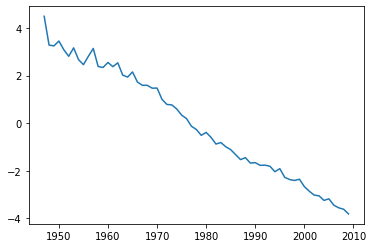

In [9]:
import seaborn as sns
sns.lineplot(year.reshape(-1,T+1)[:,0],k_t)
year.reshape(-1,T+1)[:,0]

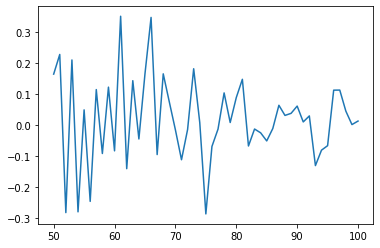

In [10]:
sns.lineplot(age.reshape(span+1,-1)[0], b_x)

In [11]:
np.diff(k_t)

array([-1.21436271e+00, -3.21535341e-02,  2.03446562e-01, -3.64326273e-01,
       -2.77851954e-01,  3.54375731e-01, -4.94128606e-01, -2.11555187e-01,
        3.49812703e-01,  3.30592794e-01, -7.59731131e-01, -3.75233536e-02,
        2.09162053e-01, -1.77270281e-01,  1.62526472e-01, -5.19128160e-01,
       -7.96701877e-02,  2.14239196e-01, -4.26308606e-01, -1.34645643e-01,
       -9.19488081e-04, -1.21052443e-01,  4.72421724e-03, -4.73399124e-01,
       -2.15400954e-01, -1.94093398e-02, -1.71087603e-01, -2.58379359e-01,
       -1.46952995e-01, -3.21920788e-01, -1.36747613e-01, -2.44496373e-01,
        1.22686158e-01, -2.11251015e-01, -2.79195380e-01,  6.35112693e-02,
       -1.78317649e-01, -1.21091966e-01, -2.09386545e-01, -2.08313967e-01,
        8.07776923e-02, -2.27202568e-01,  1.72089973e-02, -1.13265184e-01,
        8.85059742e-03, -4.77048000e-02, -2.28332080e-01,  1.28389344e-01,
       -3.64086882e-01, -9.44081428e-02, -3.76910502e-02,  5.10266894e-02,
       -3.09312566e-01, -

[[ 50  51  52 ...  98  99 100]
 [ 50  51  52 ...  98  99 100]
 [ 50  51  52 ...  98  99 100]
 ...
 [ 50  51  52 ...  98  99 100]
 [ 50  51  52 ...  98  99 100]
 [ 50  51  52 ...  98  99 100]]


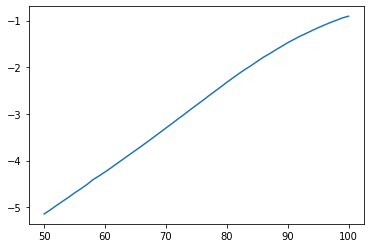

In [12]:
print(age.reshape(span+1,-1))
sns.lineplot(age.reshape(span+1,-1)[0], a_x[:,0])

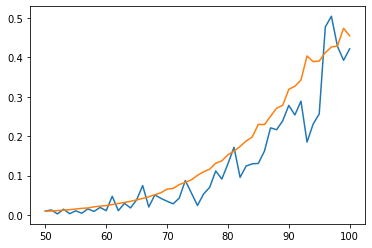

In [13]:
sns.lineplot(age.reshape(span+1,-1)[0],np.exp(logm_xt_lcfitted[:,10]))
sns.lineplot(age.reshape(span+1,-1)[0],np.exp(logm_xt[:,10]))

In [14]:
b_x.reshape(-1,1)

array([[ 0.16532607],
       [ 0.22895238],
       [-0.2827371 ],
       [ 0.2111559 ],
       [-0.28025108],
       [ 0.04968883],
       [-0.24638362],
       [ 0.11533585],
       [-0.09147334],
       [ 0.12319958],
       [-0.08289645],
       [ 0.35259153],
       [-0.14058196],
       [ 0.14416001],
       [-0.04446002],
       [ 0.16634459],
       [ 0.34878499],
       [-0.09494696],
       [ 0.16625864],
       [ 0.07517382],
       [-0.01512235],
       [-0.11163388],
       [-0.01398478],
       [ 0.18272293],
       [ 0.00847881],
       [-0.2869454 ],
       [-0.06865172],
       [-0.01255109],
       [ 0.10455783],
       [ 0.00880855],
       [ 0.08954937],
       [ 0.14856874],
       [-0.0671462 ],
       [-0.0123018 ],
       [-0.02455616],
       [-0.05080354],
       [-0.0105159 ],
       [ 0.06454315],
       [ 0.03171756],
       [ 0.03842888],
       [ 0.06197238],
       [ 0.01070099],
       [ 0.03010139],
       [-0.13060439],
       [-0.08065202],
       [-0

In [15]:
chk = logm_xt_lcfitted - a_x[:,0].reshape(-1,1)
chk = chk - np.dot(b_x.reshape(-1,1),k_t.reshape(-1,1).T)
chk = chk*chk
print(chk.sum())

1.2468278581962965e-28


In [16]:
! pip3 list | grep statsmodels

DEPRECATION: The default format will switch to columns in the future. You can use --format=(legacy|columns) (or define a format=(legacy|columns) in your pip.conf under the [list] section) to disable this warning.
statsmodels (0.11.1)


In [17]:
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller as ADF
from statsmodels.tsa.ar_model import AutoReg

(<matplotlib.axes._subplots.AxesSubplot at 0x7f27228e7828>,
 (-3.951050145901435,
  0.0016896691744788792,
  4,
  57,
  {'1%': -3.5506699942762414,
   '5%': -2.913766394626147,
   '10%': -2.5946240473991997},
  -53.77787211771194))

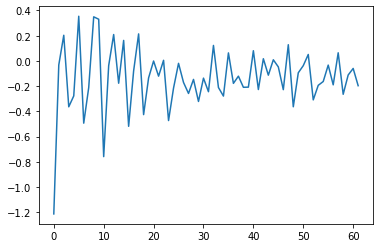

In [18]:
k_t_ADF = ADF(np.diff(k_t))
sns.lineplot(np.arange(len(np.diff(k_t))),np.diff(k_t)),k_t_ADF

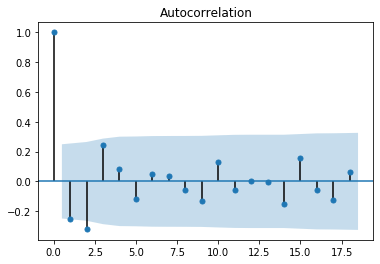

In [19]:
acf = sm.graphics.tsa.plot_acf(np.diff(k_t))

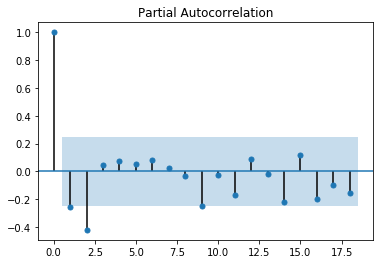

In [20]:
pacf = sm.graphics.tsa.plot_pacf(np.diff(k_t))

In [21]:
trend_evaluate = sm.tsa.arma_order_select_ic(np.diff(k_t), ic=['aic', 'bic'], trend='nc', max_ar=4, max_ma=4)

/home/chen/work/venv/lib/python3.6/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/home/chen/work/venv/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:689: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/home/chen/work/venv/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:689: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/home/chen/work/venv/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:690: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/home/chen/work/venv/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:690: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/home/chen/work/venv/lib/pyt

In [22]:
trend_evaluate

{'aic':            0          1          2          3         4
 0        NaN  24.457279  26.136298  10.277191  6.865535
 1  24.458480  26.454782  26.781446   3.451522 -7.259623
 2  26.159421  25.859292  24.230159   4.317118  7.410485
 3  14.080721  -4.697993  -3.438557  -1.554025  3.451686
 4   6.888990  -2.038508  -1.265818   0.559151  1.904025,
 'bic':            0          1          2          3          4
 0        NaN  28.711548  32.517701  18.785729  17.501207
 1  28.712749  32.836185  35.289984  14.087194   5.503183
 2  32.540824  34.367830  34.865831  17.079925  22.300426
 3  22.589259   5.937679   9.324249  13.335916  20.468761
 4  17.524662  10.724298  13.624123  17.576226  21.048235,
 'aic_min_order': (1, 4),
 'bic_min_order': (1, 4)}

In [23]:
model = ARIMA(k_t, order=(1,1,4))

In [24]:
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                   62
Model:                 ARIMA(1, 1, 4)   Log Likelihood                  13.473
Method:                       css-mle   S.D. of innovations              0.190
Date:                Fri, 05 Mar 2021   AIC                            -12.946
Time:                        13:43:31   BIC                              1.944
Sample:                             1   HQIC                            -7.100
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1291      0.019     -6.686      0.000      -0.167      -0.091
ar.L1.D.y     -0.9000      0.110     -8.183      0.000      -1.116      -0.684
ma.L1.D.y      0.3509      0.153      2.293      0.022       0.051       0.651
ma.L2.D.y     -0.7705      0.132     -5.845      0.000      -1.029      -0.512
ma.L3.D.y      0.2857      0.120      2.381      0.017       0.051       0.521
ma.L4.D.y      0.6749      0.139      4.865      0.000       0.403       0.947
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.1111           +0.0000j            1.1111            0.5000
MA.1            0.8456           -0.7095j            1.1038           -0.1111
MA.2            0.8456           +0.7095j            1.1038            0.1111
MA.3           -1.0573           -0.3133j            1.1027           -0.4541
MA.4           -1.0573           +0.3133j            1.1027            0.4541
-----------------------------------------------------------------------------
"""

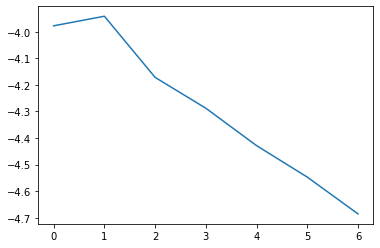

In [25]:
sns.lineplot(np.arange(7),model_fit.forecast(steps = 7)[0])

In [26]:
# age 90 = #41
age = 90
index = age - 50
steps = 7
df_test[df_test["age"]==age]

,Unnamed: 0,age,year,D,L,rate
3253,3254,90,2010,3530,21308,0.165665
3304,3305,90,2011,3438,21164,0.162446
3355,3356,90,2012,3648,22073,0.165270
3406,3407,90,2013,3630,22875,0.158689
3457,3458,90,2014,3716,23977,0.154982
3508,3509,90,2015,3865,24821,0.155715
3559,3560,90,2016,3959,25567,0.154848


In [27]:
age_predict = np.exp(a_x[index][0] + b_x[index]*model_fit.forecast(steps = steps)[0])
age_predict

array([0.17883652, 0.17923535, 0.17669637, 0.17542916, 0.17390559,
       0.17263208, 0.17115628])

In [28]:
a_x[index][0]

-1.4747981777294938

In [29]:
b_x[index]*model_fit.forecast(steps = steps)[0]

array([-0.24648499, -0.24425736, -0.25852425, -0.26572179, -0.27444451,
       -0.2817945 , -0.29038002])

In [30]:
model_fit.forecast(steps = steps)[0]

array([-3.97733636, -3.94139089, -4.1716045 , -4.2877457 , -4.42849745,
       -4.5470985 , -4.68563627])

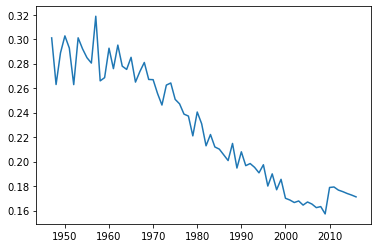

In [31]:
sns.lineplot(np.arange(min(year),min(year)+span+steps+1),np.concatenate([rate[:,index],age_predict]))

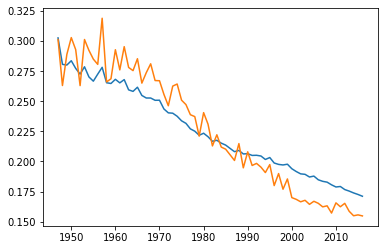

In [39]:
sns.lineplot(np.arange(min(year),min(year)+span+steps+1),np.concatenate([np.exp(a_x[index][0] + b_x[index]*k_t),age_predict]))
sns.lineplot(np.arange(min(year),min(year)+span+7+1),np.concatenate([rate[:,index],df_test[df_test["age"]==age].rate.to_numpy()]))

In [33]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

rmse = mean_squared_error(age_predict, df_test[df_test["age"]==age].rate.to_numpy(), squared=False)
mae = mean_absolute_error(age_predict, df_test[df_test["age"]==age].rate.to_numpy())

rmse,mae

(0.01593039506474301, 0.015753869439457308)

In [34]:
# AR(1)

model = sm.tsa.AutoReg(k_t, 1).fit()

model.params

array([-0.13319743,  0.98471847])

In [35]:
def ar(x, params):
    return params[0] + params[1]*x

In [36]:
ar_pred = []
ph = rate[-1,index]
print(ph)
for i in range(7):
    ph = ar(ph,model.params)
    ar_pred.append(ph)
ar_pred = np.array(ar_pred)
ar_pred

0.157232704402516


array([ 0.02163252, -0.11189548, -0.24338298, -0.37286114, -0.50036068,
       -0.62591183, -0.74954436])

In [37]:
age_ar_predict = np.exp(a_x[index][0] + b_x[index]*ar_pred)
age_ar_predict

array([0.22913188, 0.22724362, 0.22539943, 0.22359805, 0.22183826,
       0.2201189 , 0.21843884])

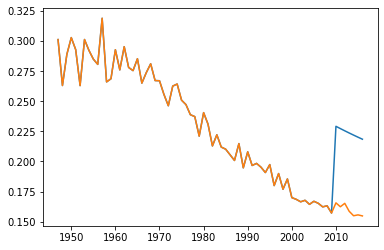

In [38]:
sns.lineplot(np.arange(min(year),min(year)+span+7+1),np.concatenate([rate[:,index],age_ar_predict]))
sns.lineplot(np.arange(min(year),min(year)+span+7+1),np.concatenate([rate[:,index],df_test[df_test["age"]==age].rate.to_numpy()]))